# Interesting Observations in Diabetes dataset

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_excel("./diabetes.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


<div class="alert alert-block alert-info" style="color:gray">
    <h2>Insulin-Outcome Correlation</h2>
</div>

Diabetes is closely related to insulin secretion in human beings. Both `Type1` and `Type2` diabetes secretion are charecterized by either zero or no secretion of insulin. We shall study what's the effect of no Insulin secretion and some insulin secretion on the outcome. 

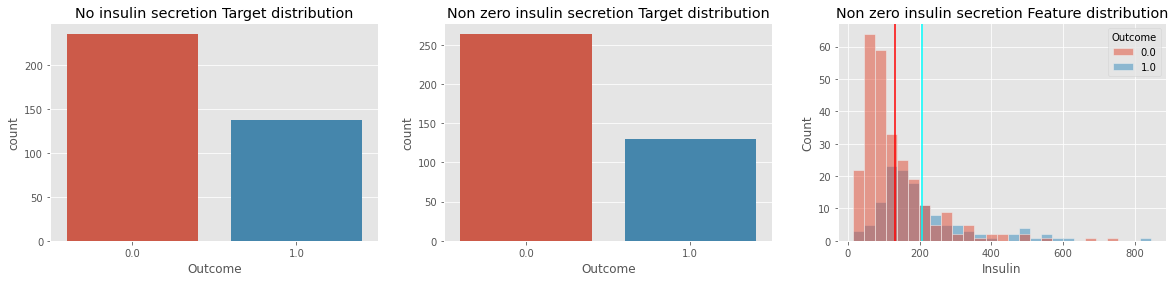

In [15]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 3, figsize = (20, 4))

sns.countplot(x = df[df.Insulin == 0].Outcome, ax = ax[0])
sns.countplot(x = df[df.Insulin > 0].Outcome, ax = ax[1])
sns.histplot(x = df[df.Insulin > 0].Insulin, hue = df[df.Insulin > 0].Outcome, ax = ax[2])

tmp = df[df.Insulin > 0]
outcome0_mean = tmp[tmp.Outcome == 0].Insulin.mean()
outcome1_mean = tmp[tmp.Outcome != 0].Insulin.mean()

ax[2].axvline(outcome0_mean, c = "r")
ax[2].axvline(outcome1_mean, c = "cyan")

ax[0].set_title(f"No insulin secretion Target distribution")
ax[1].set_title(f"Non zero insulin secretion Target distribution");
ax[2].set_title(f"Non zero insulin secretion Feature distribution");

In both the cases i.e. people with and without insulin secretion, we are observing very similar distributions which is a cause for concern wrt sanctity of the data.

Also within non-zero insulin secretion folks, those having diabetes are secreting more insulin on an average than the ones that don't have diabetes which looks unlikely in a real world scenario.

<div class="alert alert-block alert-info" style="color:gray">
    <h2>Skin-Thickness-Outcome Correlation</h2>
</div>

A very similar analysis could be done for analysing skin thickness as follows.

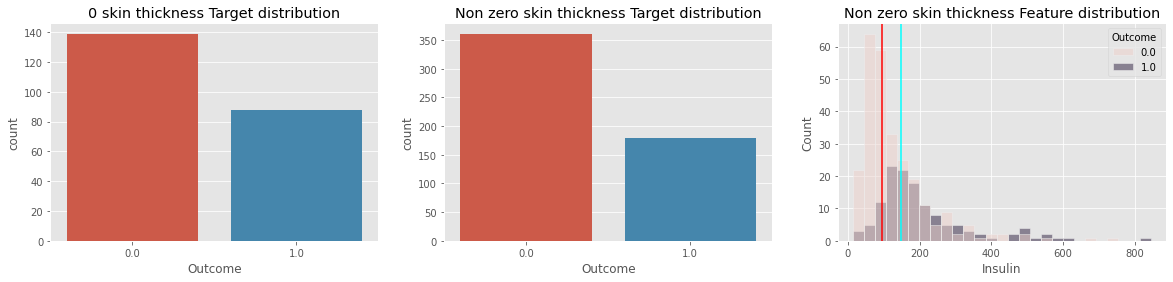

In [17]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(1, 3, figsize = (20, 4))

sns.countplot(x = df[df.SkinThickness == 0].Outcome, ax = ax[0])
sns.countplot(x = df[df.SkinThickness > 0].Outcome, ax = ax[1])
sns.histplot(x = df[df.SkinThickness > 0].Insulin, hue = df[df.Insulin > 0].Outcome, ax = ax[2])

tmp = df[df.SkinThickness > 0]
outcome0_mean = tmp[tmp.Outcome == 0].Insulin.mean()
outcome1_mean = tmp[tmp.Outcome != 0].Insulin.mean()

ax[2].axvline(outcome0_mean, c = "r")
ax[2].axvline(outcome1_mean, c = "cyan")

ax[0].set_title(f"0 skin thickness Target distribution")
ax[1].set_title(f"Non zero skin thickness Target distribution");
ax[2].set_title(f"Non zero skin thickness Feature distribution");

Most of the times, it is observed that diabetes and obesity co-occur with each other.

This means in cases where there's skin fat or disproportionately high skin-fat, there should be higher prevalance of the an outcome of diabetes, however that doesn't seem to be the case...

Also, no human is skinless, so having a 0 skin thickness could be a proxy for missing values...